In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
def calculate_time_intervals(df):
    """
    Calculate the time intervals between calls for each frog.
    """
    df['time_interval'] = df.groupby('frog_id_kmm')['frame_indexes'].diff()
    return df


In [111]:

def calculate_call_duration(df):
    """
    Calculate the duration of each call using the 'time_interval' column.

    - Assumes 'time_interval' is already calculated.
    - Identifies start and end frames for each call.
    - Calculates call duration based on frame continuity.

    Returns a DataFrame with:
    - 'frog_id': The frog making the call
    - 'call_start': The frame number where the call started
    - 'call_end': The frame number where the call ended
    - 'call_duration': Duration of the call in frames
    """
    calls = []

    # Iterate over each frog group
    for frog_id, group in df.groupby('frog_id_kmm'):
        call_start = None
        prev_frame = None

        for idx, row in group.iterrows():
            if pd.isna(row['time_interval']):  # First call for the frog
                call_start = row['frame_indexes']
            elif row['time_interval'] == 1:  # Consecutive call
                pass  # Continue counting within the same call
            elif row['time_interval'] > 1:  # New call starts
                if call_start is not None:
                    calls.append({
                        'frog_id_kmm': frog_id,
                        'call_start': call_start,
                        'call_end': prev_frame,
                        'call_duration': prev_frame - call_start + 1
                })
                call_start = row['frame_indexes']  # Reset for the new call

            prev_frame = row['frame_indexes']

        # Handle the last call for the frog
        if call_start is not None:
            calls.append({
                'frog_id_kmm': frog_id,
                'call_start': call_start,
                'call_end': prev_frame,
                'call_duration': prev_frame - call_start + 1
            })

    return pd.DataFrame(calls)


In [101]:
def compute_time_difference(df):
    df_filtered = df[df['time_interval'] > 1].copy()  # Ensure modification happens on a copy
    return df_filtered

In [139]:
def plot_frog_call_distribution(df_filtered,column ):
      # Ensure 'frog_id_kmm' exists
    if 'frog_id_kmm' not in df_filtered.columns:
        raise ValueError("Column 'frog_id_kmm' does not exist in the DataFrame")

    # Convert 'frog_id_kmm' to categorical (as string)
    df_filtered['frog_id_kmm'] = df_filtered['frog_id_kmm'].astype(str)

    # # Handle extreme outliers (adjust threshold if needed)
    q98 = df_filtered[column].quantile(0.998)  # Use 98th percentile instead of 90th
    df_filtered = df_filtered[df_filtered[column] <= q98]


    # Plot KDE for each 'frog_id_kmm'
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_filtered, x=column, hue="frog_id_kmm", fill=False, legend=True)

    # Customize plot
    plt.xlabel("Time Interval Between Calls")
    plt.ylabel("Density")
    plt.title("KDE of Time Intervals for Each Frog")

    # Explicitly set legend if needed
    plt.legend(title="Frog ID", labels=df_filtered["frog_id_kmm"].unique())

    plt.show()


In [99]:
csv_path="frog_calls_clusters.csv"
data= pd.read_csv(csv_path)

In [100]:
time_intervals_df =calculate_time_intervals(data)

In [67]:
time_differences = compute_time_difference(time_intervals_df)

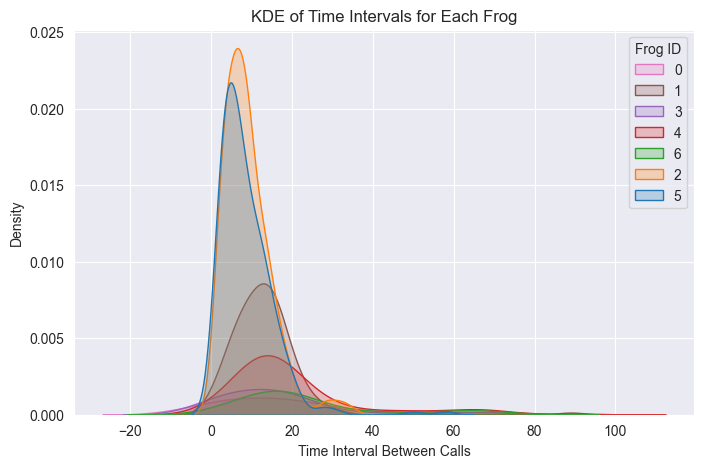

In [86]:
plot_frog_call_distribution(time_differences,"time_interval")

In [113]:
call_duration_per_frog =calculate_call_duration(time_intervals_df)

In [127]:
highest_call_duration =call_duration_per_frog.sort_values(by=["call_duration"],ascending=False)
print(highest_call_duration.head(10))

    frog_id_kmm  call_start  call_end  call_duration
0             0           0        80             81
79            0        1029      1057             29
74            0         962       985             24
133           0        1630      1647             18
81            0        1070      1087             18
60            0         793       808             16
75            0         994      1009             16
6             0         137       152             16
58            0         763       778             16
119           0        1456      1470             15


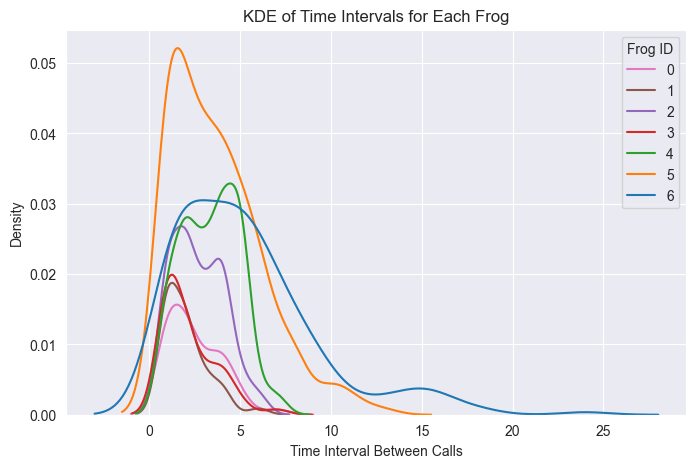

In [140]:
plot_frog_call_distribution(call_duration_per_frog,"call_duration")